# 1. Mengakses Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import numpy as np
import os
import gzip
from io import BytesIO
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd

# Memuat data Aksara dari file lokal
def load_aksara_images(file_path):
    """Membaca file gambar aksara dari format binary."""
    with gzip.open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        rows = int.from_bytes(f.read(4), 'big')
        cols = int.from_bytes(f.read(4), 'big')
        buffer = f.read()
        data = np.frombuffer(buffer, dtype=np.uint8)
        data = data.reshape(num_images, rows, cols, 1)
        return data / 255.0

def load_aksara_labels(file_path):
    """Membaca file label aksara dari format binary."""
    with gzip.open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        num_labels = int.from_bytes(f.read(4), 'big')
        buffer = f.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)
        return labels

# Path ke folder dataset
train_dir = "/content/drive/My Drive/datasetAksara18/train"
test_dir = "/content/drive/My Drive/datasetAksara18/test"

# Muat data training dan testing
train_images = load_aksara_images(f"{train_dir}/train-images-idx3-ubyte.gz")
train_labels = load_aksara_labels(f"{train_dir}/train-labels-idx1-ubyte.gz")

test_images = load_aksara_images(f"{test_dir}/t10k-images-idx3-ubyte.gz")
test_labels = load_aksara_labels(f"{test_dir}/t10k-labels-idx1-ubyte.gz")

# Verifikasi bentuk data
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

Train Images Shape: (1396, 280, 280, 1)
Train Labels Shape: (1396,)
Test Images Shape: (349, 280, 280, 1)
Test Labels Shape: (349,)


# Membuat Model

In [3]:

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(280, 280, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(18, activation='softmax')
        ])
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model




# Train Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 278, 278, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 139, 139, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 137, 137, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 68, 68, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 295936)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      37,879,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 18)                  │           2,322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,901,074 (144.58 MB)

 Trainable params: 37,901,074 (144.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.3680 - loss: 2.3581 - val_accuracy: 0.7908 - val_loss: 0.6641
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9288 - loss: 0.2510 - val_accuracy: 0.8682 - val_loss: 0.4958
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.9890 - loss: 0.0361 - val_accuracy: 0.8682 - val_loss: 0.4556
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.9943 - loss: 0.0212 - val_accuracy: 0.8567 - val_loss: 0.5012
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9987 - loss: 0.0080 - val_accuracy: 0.8940 - val_loss: 0.4087
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.8711 - val_loss: 0.5147
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 1.0000 - loss: 2.7504e-04 - val_accuracy: 0.8825 - val_loss: 0.5026
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 1.0000 - loss: 1.3294e-04 - val_accuracy: 

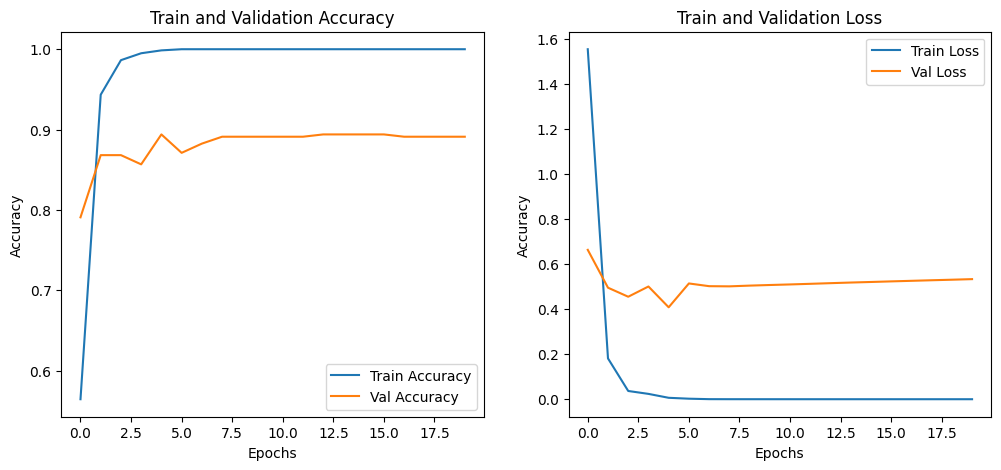

In [13]:
def train_model(model, train_images, train_labels, test_images, test_labels):
    history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))
    plot_training_graphs(history)
    return history


# Membuat dan melatih model
model = create_model()
history = train_model(model, train_images, train_labels, test_images, test_labels)

# Menampilkan hasil Train

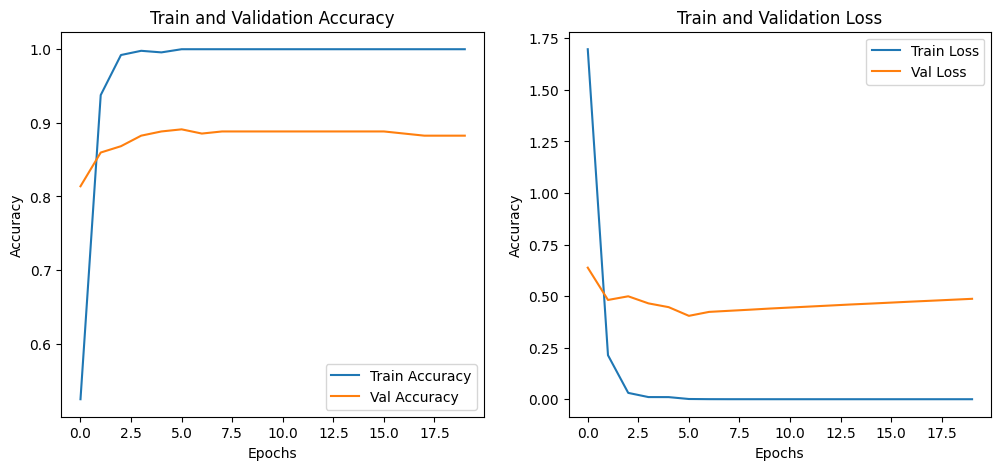

In [8]:
def plot_training_graphs(history):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Val Accuracy')
    axes[0].set_title('Train and Validation Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Val Loss')
    axes[1].set_title('Train and Validation Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.show()

plot_training_graphs(history)


# Menguji Model

In [12]:
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

# Function to make predictions
def file_predict(filename, file, out):
    """A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(280, 280))
    image = tf.keras.utils.img_to_array(image)
    image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0]

    # Sort and get the top 3 predictions
    top_indices = np.argsort(prediction)[-3:][::-1]  # Get indices of top 3 classes
    top_percentages = prediction[top_indices] * 100  # Convert probabilities to percentages

    label_map = {
        0: 'A', 1: 'BA', 2: 'CA', 3: 'DA', 4: 'GA', 5: 'JA', 6: 'KA', 7: 'LA', 8: 'MA', 9: 'NA',
        10: 'NGA', 11: 'NYA', 12: 'PA', 13: 'RA', 14: 'SA', 15: 'TA', 16: 'WA', 17: 'YA'
    }

    print("Top 3 Predictions:")
    print(f"File Name : {filename}")
    for i in range(3):
        label = label_map[top_indices[i]]  # Dapatkan label dari angka
        print(f"{i+1}. {label}: {top_percentages[i] :.2f}%")

    return top_indices, top_percentages

# Function to handle file uploads
def on_upload_change(change):
    """A function to handle uploaded files and run predictions."""
    for filename, file_info in change.new.items():  # Access filename and file data
        file_content = BytesIO(file_info['content'])  # Get file content as BytesIO
        file_predict(filename, file_content, out)

# Attach the observer
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

Top 3 Predictions:
File Name : Ka.png
1. KA: 100.00%
2. MA: 0.00%
3. TA: 0.00%
Top 3 Predictions:
File Name : Ca.jpg
1. CA: 100.00%
2. MA: 0.00%
3. KA: 0.00%
Top 3 Predictions:
File Name : ma.jpg
1. MA: 100.00%
2. PA: 0.00%
3. WA: 0.00%
